# [LAB 10] 4. 가설검정의 가정

가설 검정 수행을 위해서는 데이터의 정규성, 등분산성, 독립성이 확인되어야 함

일반적으로 데이터 수집 시에 독립성이 확보되므로 추가적인 검정이 필요하지 않을 수 있지만 정규성과 등분산성은 별도의 검정 과정을 통해 확인해야한다

### #01.준비작업
#### [1] 패키지 참조



In [ ]:
from hossam import load_data
from pandas import melt, DataFrame
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
 # 가설 검정의 가정에 필요한 패키지
from scipy.stats import shapiro, skew, kurtosis, normaltest, bartlett, levene

ImportError: cannot import name 'Kurtosis' from 'scipy.stats' (c:\Users\itwill\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\__init__.py)

#### [2] 그래프 초기화

In [7]:
#한글을 지원하는 폰트 파일의 경로
font_path ='C:\\Data_Analysis_Basic\\[LAB-06] 데이터 시각화 개요\\NotoSansKR-Regular.ttf'
#폰트의 그룹을 시스템에 등록
fm.fontManager.addfont(font_path)
#폰트의 속성을 읽어옴
font_prop = fm.FontProperties(fname=font_path)
#읽어온 속성에서 폰트의 이름만 추출
font_name = font_prop.get_name()

#이미지의 선명도를 결정 (1인치 당 픽셀의 수)
my_dpi = 120 
#시스템에 등록된 글꼴 이름  (상단에서 확인한 폰트 이름으로 넣기)
my_font_name = 'Noto Sans KR'
#그림 스타일 지정
my_theme = 'dark'
#seaborn 스타일 (화풍 설정하기)
sb.set_theme(style=my_theme)
#그래프에 한글 폰트 적용
plt.rcParams['font.family']=my_font_name
#기본 폰트 크기
plt.rcParams['font.size'] =16
#그래프에 마이너스 꺠짐 방지 (한글환경에서 필수)
plt.rcParams['axes.unicode_minus']=False

#### [3] 데이터 가져오기
동일한 제품을 판매하고 있는 서로 다른 두 지역의 매장의 100일간의 일별 매출액을 기록한 가상의 데이터이다.

이 데이터를 사용하여 두 매장의 평균 매출액을 비교하고자 한다.
수집된 데이터가 평균 비교에 적합한지 알아보라.

In [3]:
origin = load_data('two_store')
origin

[data] https://data.hossam.kr/data/lab10/two_store.xlsx
[desc] 동일한 제품을 판매하고 있는 서로 다른 두 지역의 매장의 100일간의 일별 매출액을 기록한 가상의 데이터 (출처: 방송통신대학교 통계학개론)
[!] Cannot read metadata


,store1,store2
0,34,63
1,63,85
2,57,75
3,50,48
4,37,58
...,...,...
95,53,69
96,52,51
97,52,65
98,49,59


### #02. 데이터 분포 확인
히스토그램과 커널 밀도함수 그래프를 통해 전반적인 데이터의 분포를 확인한다.
정규분포를 충족하는 데이터는 시각화의 모양이 좌우 대칭인 상태로 봉긋하게 나타나야한다

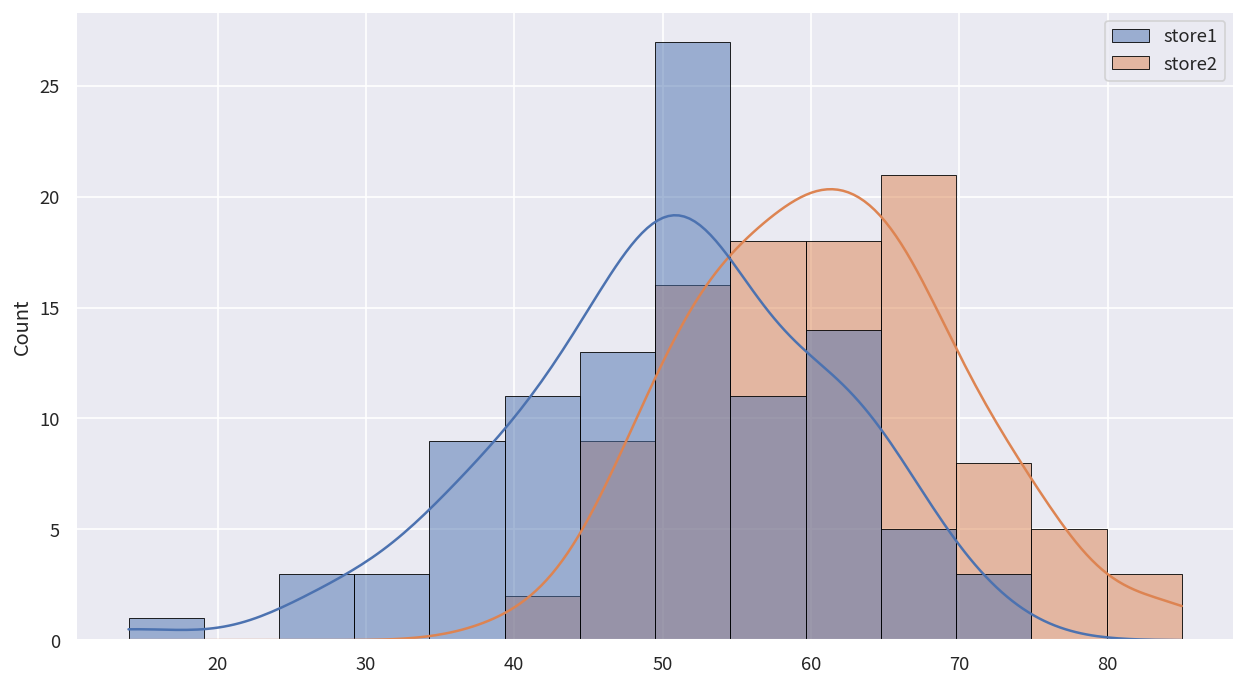

In [8]:
# 1) 그래프 초기화
width_px = 1280              # 그래프 가로 크기
height_px = 720              # 그래프 세로 크기
rows = 1                     # 그래프 행 수
cols = 1                     # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) Histogram 그리기
sb.histplot(
    data=origin, kde = True , edgecolor = '#000000',linewidth=0.5
)

# 3) 그래프 꾸미기
ax.grid(True)                 # 배경 격자 표시/숨김

# 4) 출력
plt.tight_layout()            # 여백 제거
plt.savefig("plot.png", dpi=my_dpi * 2)
plt.show()                    # 그래프 화면 출력
plt.close()                   # 그래프 작업 종료


> 정규분포 처럼 생겼긴 하지만 정확한 정규성을 하단에서 확인해보자

### #02. 데이터 정규성 확인
데이터의 정규성을 검정하는 방법에는 Shapiro Wwilk 검정, Normal Test 검정이 있다

| 가설 | 내용 | 설명 |
|------|------|------|
| 귀무가설 (H₀) | P > 0.05 | 집단간 데이터 분포에는 차이가 없다 (정규성을 따름) |
| 대립가설 (H₁) | P ≤ 0.05 | 집단간 데이터 분포에는 차이가 있다 (정규성을 따르지 않음) |


#### [1] Shapiro Wilk 검정
샤피로 윌크 검정은 매우 엄격하고, 충족하기 위해서는 이상치가 없어야하면서 좌우대칭을 요구하기 때문에 현실에서 이 기준에 맞는 데이터를 찾기는 어렵다
(예제 데이터는 정규분포를 충족하는 난수 형태로 생성된 경우)


#### (1) stor1 ,store 2 에 대한 정규성 확인

In [9]:
s,p = shapiro(origin['store1'])
"statistic : {0:.3f}, p-value : {1:.3f} , 정규성 충족 여부 : {2}".format(s,p,p >0.05)

'statistic : 0.979, p-value : 0.109 , 정규성 충족 여부 : True'

In [10]:
s,p = shapiro(origin['store2'])
"statistic : {0:.3f}, p-value : {1:.3f} , 정규성 충족 여부 : {2}".format(s,p,p >0.05)

'statistic : 0.991, p-value : 0.731 , 정규성 충족 여부 : True'

> store1과 store2 각각 p-value 값이 0.109 , 0.991 이라 p-value 가 0.05 보다 커 귀무가설을 기각하지 못한다 (즉 정규분포와 차이가 없다 = 정규 분포다) 

> 다만 이렇게 정규성을 따르는 데이터는 잘 없다

#### [2] Normal Test
왜도 (Skew) 와 첨도 (Kurtosis) 를 통해 정규성을 검정한다
West 등(1995)의 연구에 따르면 정규분포 기준은 |왜도| < 2 , |첨도| < 7 이면 정규분포에서 크게 벗어나지 않아 정규성을 충족한다고 볼 수 있고, Shapito 검정에 비해 느슨한 기준이기 때문에 많은 논문에서 인용되고 있다

#### (1) 왜도와 첨도 직접 구하기
- store 1 의 왜도와 첨도

왜도는 분포의 비대칭 정도를 나타낸다
왜도의 절대값이 2보다 작은 경우, 정규성을 충족하는 것으로 판단한다


| 구분           | 내용     |
|----------------|----------|
| 정규분포       | 왜도 = 0 |
| 왼쪽으로 치우침 | 왜도 > 0 |
| 오른쪽으로 치우침 | 왜도 < 0 |

In [ ]:
s = skew (origin['store1'])
print('왜도: %0.3f'%s)
print('왜도의 절대값 : %0.3f'%abs(s))

왜도: -0.506
왜도의 절대값 : 0.506


> 왜도의 절대값이 0.51 로 2보다 작다 > 정규성을 충족한다

- store1의 첨도
  
분포의 뾰족한 정도

| 구분           | 내용     |
|----------------|----------|
| 정규분포       | 첨도 = 0 |
| 위로 뾰족함     | 첨도 > 0 |
| 아래로 뾰족함   | 첨도 < 0 |

\|첨도\| < 7 인 경우 정규성을 충족하는 것으로 판단한다.


In [20]:
k = kurtosis(origin['store1'])
print('첨도 : %0.3f'%s)
print('첨도의 절대값 : %0.3f'%abs(s))

첨도 : -0.506
첨도의 절대값 : 0.506


> 첨도의 절대값이 0.506 으로 7보다 작다 > 정규성을 충족한다 

- store2에 대한 왜도와 첨도 확인

In [21]:
s = skew (origin['store2'])
k = kurtosis(origin['store2'])
print('왜도의 절대값 : %0.3f, 첨도의 절대값: %0.3f'%(abs(s),abs(k)))

왜도의 절대값 : 0.251, 첨도의 절대값: 0.178


> 왜도의 절대값이 2보다 작고 ,첨도의 절대값이 7보다 작어 정규성을 충족한다

#### (2) Normal Test 를 통한 정규성 검정
- 왜도와 첨도를 활용한 정규성 검정이므로 위처럼 왜도와 첨도를 일일이 구할 필요가 없다

- Normaltest 의 p-value 값이 0.05보다 크면 , 정규성과 차이가 없다는 귀무가설을 기각하지 못해 정규성이 충족되었다는 의미가 된다 (왜도의 절대값이 2보다 작고, 첨도가 절대값이 7보다 작을떄 p-value 가 0.05 보다 커짐)


- Normaltest 를 활용한 store1, store2의 정규성 확인

In [22]:
#store 1 의 경우
s,p = normaltest(origin['store1'])
"statistic : {0:.3f} , p-value:{1:.3f},정규성 충족 여부 : {2}".format(s,p,p > 0.05)

'statistic : 5.651 , p-value:0.059,정규성 충족 여부 : True'

In [23]:
#store 2 의 경우
s,p = normaltest(origin['store2'])
"statistic : {0:.3f} , p-value:{1:.3f},정규성 충족 여부 : {2}".format(s,p,p > 0.05)

'statistic : 1.174 , p-value:0.556,정규성 충족 여부 : True'

> store1, store2 의 p-value 가 모두 0.05 보다 크기 때문에 정규성을 따른다고 판단한다

In [ ]:
fmt = "[{0}] statistic: {1:.3f}, p-value: {2:.3f} , 정규성 충족 여부 : {3}"

for c in origin.columns:
    s, p = normaltest(origin[c])
    
    if p >= 0.05:
      result = "정규성 충족"
    else:
      result = "정규성 불충족"

    print(fmt.format(c, s, p, result))


[store1] statistic: 5.651, p-value: 0.059 , 정규성 충족 여부 : 정규성 충족
[store2] statistic: 1.174, p-value: 0.556 , 정규성 충족 여부 : 정규성 충족


### #03. 데이터 등분산성 확인
### 등분산성 검정 결과 해석

| 가설            | 내용       | 설명                          |
|-----------------|------------|-------------------------------|
| 귀무가설(H₀)    | P > 0.05   | 집단간 분산의 차이가 없다     |
| 대립가설(H₁)    | P ≤ 0.05   | 집단간 분산의 차이가 있다     |


#### [1] Bartlett 검정
- 데이터가 정규분포를 따를 때 집단 간 분산이 같은지 다른지 여부를 확인할 때 사용

In [28]:
#파라미터 수의 제한 x
s,p = bartlett(origin['store1'],origin['store2'])
print('Bartlett 검정 : statistic : {0:.3f}, p-value : {1:.3f}, 등분산성 충족 여부 : {2}'.format(s,p,p >0.05))

Bartlett 검정 : statistic : 3.143, p-value : 0.076, 등분산성 충족 여부 : True


#### [2] Levene's test
- 데이터가 정규분포를 따르지 않을 떄 사용할 수 있는 방법

In [30]:
#파라미터 수의 제한 x
s,p = levene(origin['store1'],origin['store2'])
print('Levene 검정 : statistic : {0:.3f}, p-value : {1:.3f}, 등분산성 충족 여부 : {2}'.format(s,p,p >0.05))

Levene 검정 : statistic : 1.360, p-value : 0.245, 등분산성 충족 여부 : True


#### [3] 정규성 여부에 따라 반복문으로 한번에 처리하기

In [31]:
normal_dist = True      # 정규성 만족 여부
data = origin.copy()    # 원본 데이터 복사
fields = list(map(lambda x: data[x], data.columns))

if normal_dist:
    n = "Bartlett"
    s, p = bartlett(*fields)
else:
    n = "Levene"
    s, p = levene(*fields)

print("{0} 검정: statistic: {1:.3f}, p-value: {2:.3f}, 정규성 충족 여부: {3}"
      .format(n, s, p, p > 0.05))


Bartlett 검정: statistic: 3.143, p-value: 0.076, 정규성 충족 여부: True


#### #4.정규성, 등분산성 검정 결과표 만들기

In [32]:
data = melt(origin,var_name = 'store' , value_name = 'value')
data

,store,value
0,store1,34
1,store1,63
2,store1,57
3,store1,50
4,store1,37
...,...,...
195,store2,69
196,store2,51
197,store2,65
198,store2,59


In [33]:
xname = 'store'
yname = 'value'

u1 = data[xname].unique()
equal_var_fields = []
normal_dist = True
report = []

for i in u1:
    filtered_data = data[data[xname] == i][yname]
    equal_var_fields.append(filtered_data)
    s, p = normaltest(filtered_data)

    normalize = p > 0.05
    report.append({
        "field": i,
        "statistic": s,
        "p-value": p,
        "result": normalize
    })
    normal_dist = normal_dist and normalize

if normal_dist:
    n = "Bartlett"
    s, p = bartlett(*equal_var_fields)
else:
    n = "Levene"
    s, p = levene(*equal_var_fields)

report.append({
    "field": n,
    "statistic": s,
    "p-value": p,
    "result": p > 0.05
})

report_df = DataFrame(report).set_index('field')
report_df


,statistic,p-value,result
field,,,
store1,5.651229,0.059272,True
store2,1.173772,0.556056,True
Bartlett,3.143307,0.076239,True
